# Assignment 5: Visualisation using Matplotlib
Bar chart

Pie charts

Lines chart

Box plot

Scatter plots

Created by: Tidiane Diallo

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load data from the CSV link
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)
# df means data_frame

# Bar chart with Bins: Number of Earthquakes by Magnitude Range

[2587 3959 1517  268  685  105   12    0    0]


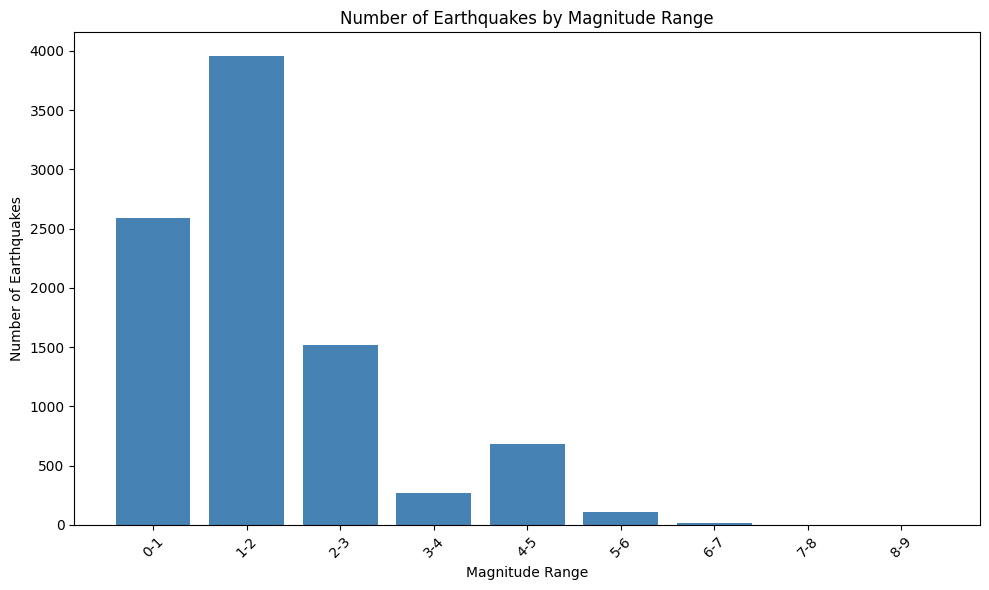

In [3]:
# Number of Earthquakes by Magnitude Range
# Load data from the CSV URL
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# Idea is to exhibit the frequency of earthquakes according to different ranges of magnitude
# Therefore we define bins and ranges
# Define magnitude bins
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create magnitude range labels. These will be the labels on the X axis
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9']

# Add a new column 'Magnitude Range' to the DataFrame. pd.cut allows to classify the eq magnitudes into bins and ranges
df['Magnitude Range'] = pd.cut(df['mag'], bins=bins, labels=labels, right=False)

# Group earthquakes by magnitude range and count them. Sorting ensures labels on x-axis are in ascending order 
magnitude_counts = df['Magnitude Range'].value_counts().sort_index()

# Define x and y
x = magnitude_counts.index
y = magnitude_counts.values

print(magnitude_counts.values) # A print of values shows the second mag_range 1-2 on a richter scale has the
# largest number of earthquakes i.e. 3953

# Create the bar chart using the ax object
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(magnitude_counts.index, magnitude_counts.values, color='steelblue')
ax.set_xlabel('Magnitude Range')
ax.set_ylabel('Number of Earthquakes')
ax.set_title('Number of Earthquakes by Magnitude Range')
ax.tick_params(axis='x', rotation=45) # a rotation of 45 indicates an angle of 45° for better visibilty of label
plt.tight_layout()

# Show the plot
plt.show()


# Summary of stats

In [4]:
# df.describe().round(2)

# Statistics of earthquake magnitudes

In [5]:
# Get summary statistics for the 'mag' column. We index the column and execute the function "describe"
mag_describe = df['mag'].describe()
# Create a new table with 'mag' as the index and the summary statistics in a single column using a dictionary
mag_describe_df = pd.DataFrame({'mag': mag_describe})
# Format to two decimal places
mag_describe_df = mag_describe_df.round(2)
# Print the DataFrame with the row title
print(mag_describe_df)

           mag
count  9641.00
mean      1.58
std       1.21
min      -1.12
25%       0.80
50%       1.37
75%       2.01
max       6.80


# Duration of Data Coverage (in days):

In [6]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")

# Convert the "time" column to a datetime object
df['time'] = pd.to_datetime(df['time'])

# Find the earliest and latest time references
earliest_timeref = df['time'].min()
latest_timeref = df['time'].max()

# Calculate the number of days covered
num_days_covered = (latest_timeref - earliest_timeref).days

print(f"The CSV file covers {num_days_covered} days.")

The CSV file covers 29 days.


# What location recorded the highest reading?

In [7]:
# Find the row with the highest magnitude
max_magnitude_row = df[df['mag'] == df['mag'].max()]

# Get the place and time information for the highest magnitude earthquake
place = max_magnitude_row.iloc[0]['place']
time = max_magnitude_row.iloc[0]['time']

# Print the result
print(f"The highest magnitude earthquake was recorded at {place} on {time}.")


The highest magnitude earthquake was recorded at Al Haouz, Morocco on 2023-09-08 22:11:01.432000+00:00.


In [8]:
# view all columns titles
print (df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


# Lines chart: Earthquake Activity Over Time

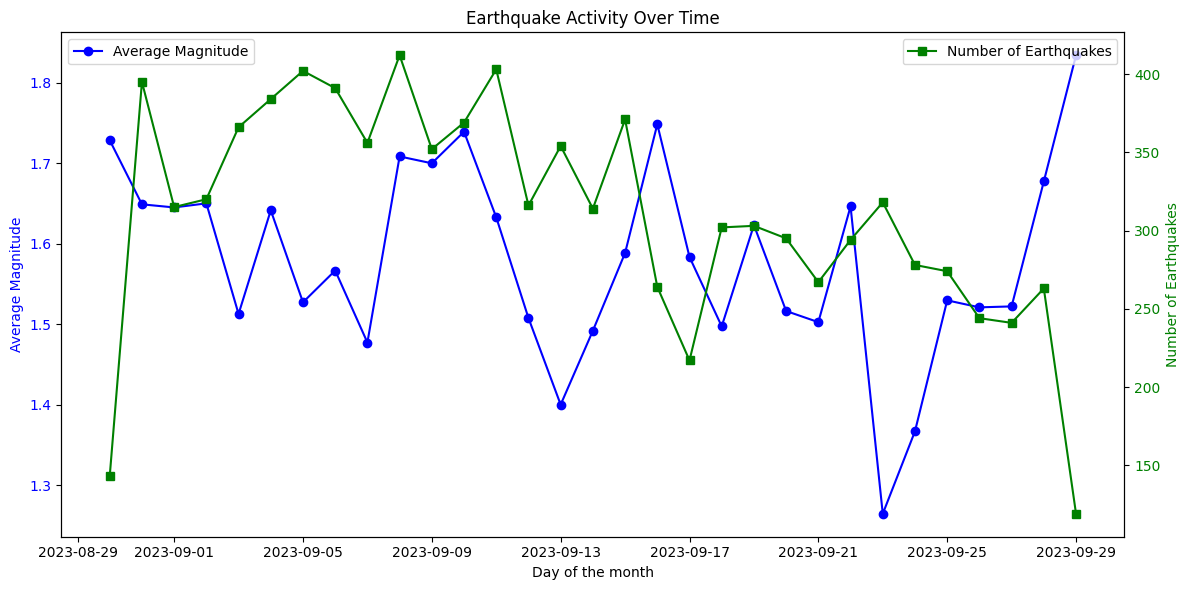

In [9]:
# Earthquake Activity Over Time
# Convert the 'time' column to datetime
time = pd.to_datetime(df['time'])

# Group data by date and calculate statistics (mean and size)
daily_avg_mag = df.groupby(time.dt.date)['mag'].mean()
daily_num_earthquakes = df.groupby(time.dt.date).size()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average magnitude on the left y-axis
ax1.plot(daily_avg_mag.index, daily_avg_mag, label='Average Magnitude', color='blue', marker='o', linestyle='-')
ax1.set_xlabel('Day of the month')
ax1.set_ylabel('Average Magnitude', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the number of earthquakes on the right hand side (RHS) or secondary axis
ax2 = ax1.twinx() # ---> twinx is the fn used to create a second axis
ax2.plot(daily_num_earthquakes.index, daily_num_earthquakes, label='Number of Earthquakes',
          color='green', marker='s', linestyle='-')
ax2.set_ylabel('Number of Earthquakes', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Chart title
ax1.set_title('Earthquake Activity Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Pie charts:
Percentage of Earthquakes by Magnitude Range

Top 10 most active locations

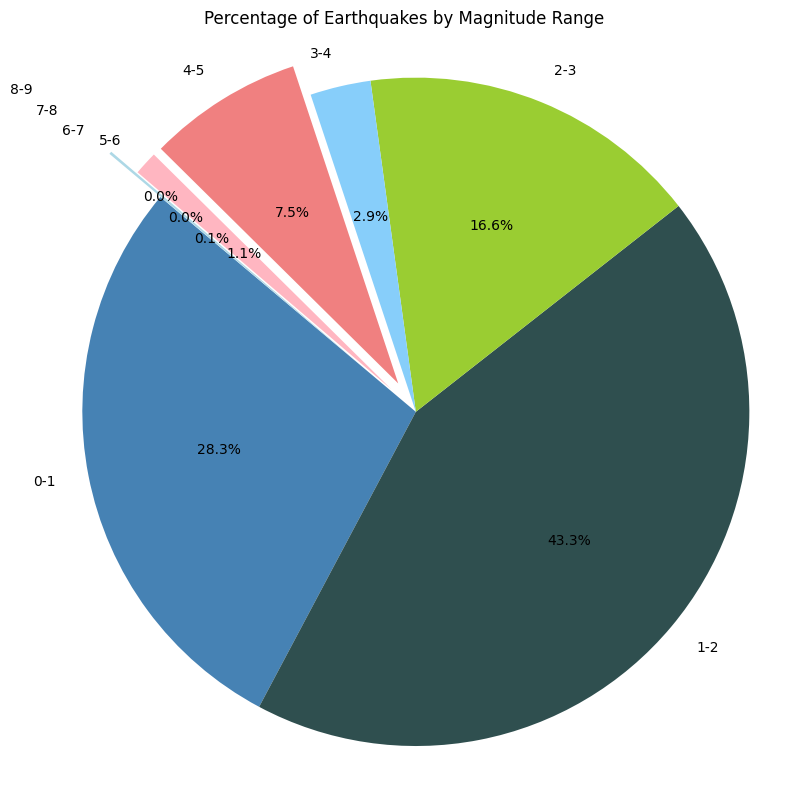

In [10]:
# Percentage of Earthquakes by Magnitude Range
# Define magnitude bins
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create magnitude range labels
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9']

# Add a new column 'Magnitude Range' to the DataFrame
df['Magnitude Range'] = pd.cut(df['mag'], bins=bins, labels=labels, right=False)

# Group earthquakes by magnitude range and count them
magnitude_counts = df['Magnitude Range'].value_counts().sort_index()

# Define colors for each label (9 labels in total)
colors = ['steelblue', 'darkslategray', 'yellowgreen', 'lightskyblue', 'lightcoral', 'lightpink', 'lightblue',
           'indigo', 'lightsalmon']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create a pie chart with custom colors. The function enhance visualisation of tiny slices
explode = (0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.3, 0.4)  # We adjusted manaually the last three tuple elements 
ax.pie(magnitude_counts, labels=magnitude_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, 
       explode=explode)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Percentage of Earthquakes by Magnitude Range')
plt.tight_layout()

# Show the plot
plt.show()

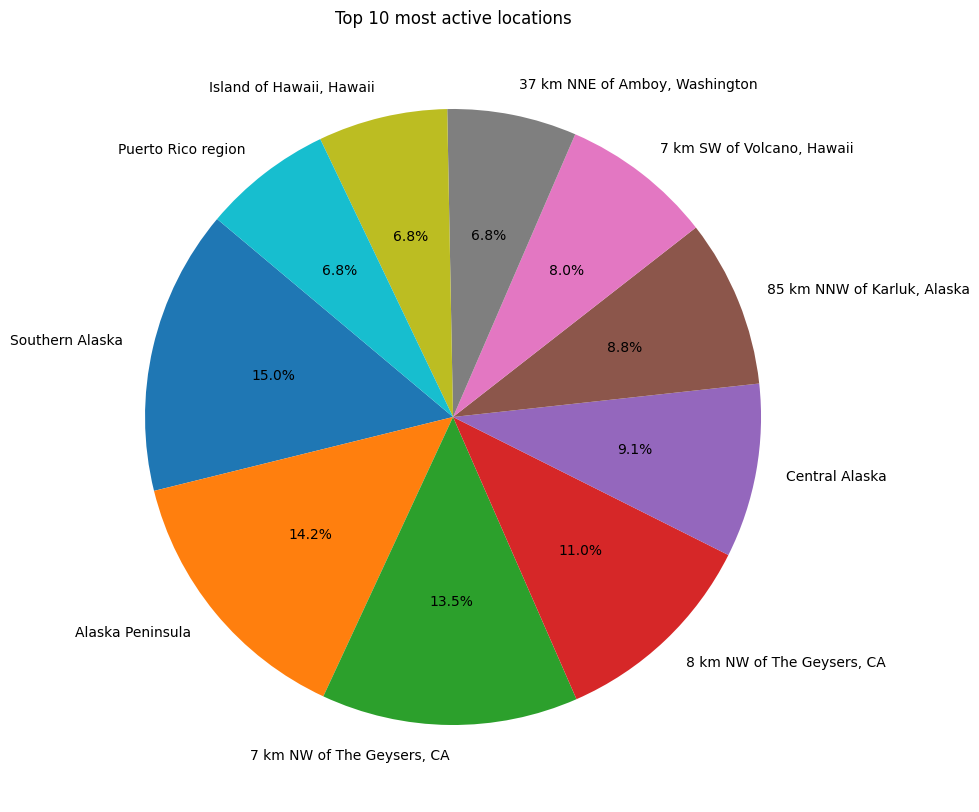

In [11]:
# Top 10 Most Active locations (Places)
# Load Data (done earlier)

# Count earthquakes by location
location_counts = df['place'].value_counts()[:10]  # Using indexing and slicing we count the top 10 most active places

# Create the Pie Chart
labels = location_counts.index
counts = location_counts.tolist() # is used to convert the Pandas location_counts into a Python list
# so that it could be used in the plt.pie below

plt.figure(figsize=(10, 10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Top 10 most active locations')

# Show the pie chart
plt.show()


# Box plot chart: Distribution of Earthquake Magnitudes by Magnitude Range

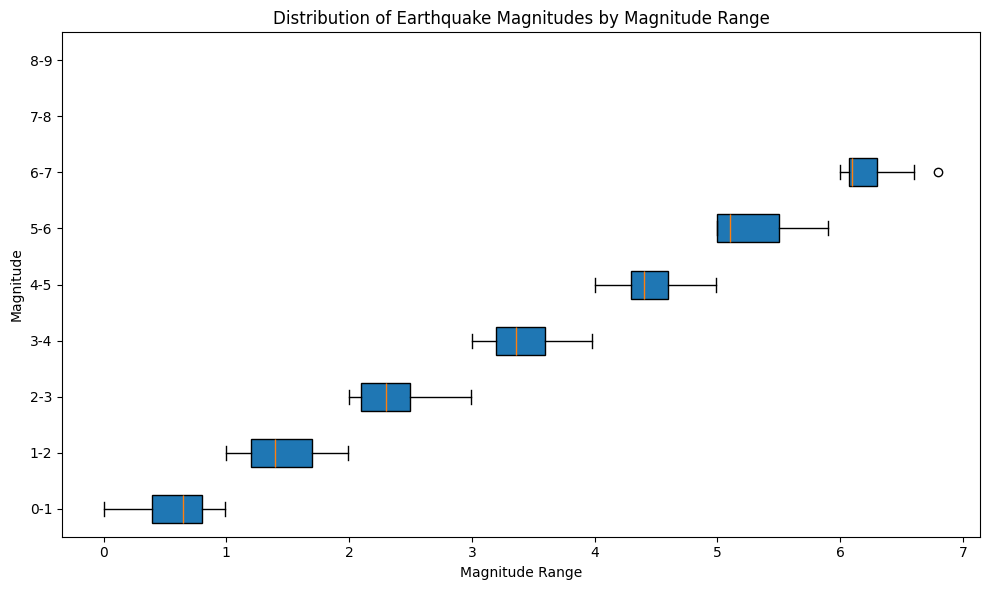

In [12]:
# Define magnitude bins
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create magnitude range labels
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9']

# Add a new column 'Magnitude Range' to the DataFrame
df['Magnitude Range'] = pd.cut(df['mag'], bins=bins, labels=labels, right=False)

# Create a list of DataFrames, one for each magnitude range
magnitude_range_data = [df[df['Magnitude Range'] == label]['mag'] for label in labels]

# Create a box plot for the earthquake magnitudes within each range
plt.figure(figsize=(10, 6))
plt.boxplot(magnitude_range_data, labels=labels, vert=False, patch_artist=True)
plt.xlabel('Magnitude Range')
plt.ylabel('Magnitude')
plt.title('Distribution of Earthquake Magnitudes by Magnitude Range')
plt.tight_layout()

# Show the plot
plt.show()


# Scatter plot: 
Magnitude vs. Depth Scatter Plot

Latitude vs. Longitude Scatter Plot

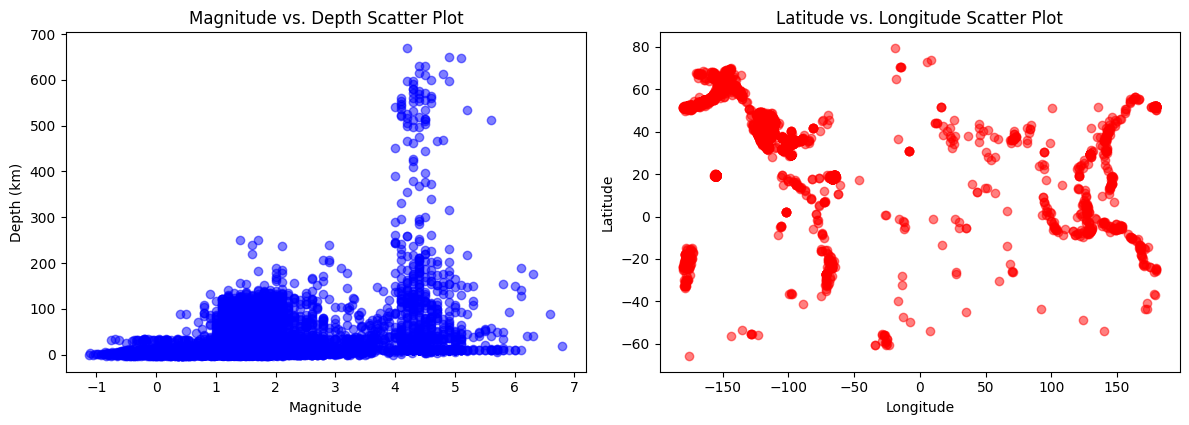

In [13]:
# Define magnitude bins
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create magnitude range labels
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9']

# Add a new column 'Magnitude Range' to the DataFrame
df['Magnitude Range'] = pd.cut(df['mag'], bins=bins, labels=labels, right=False)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# fig.suptitle('Earthquake Data Analysis', fontsize=16)

# First Scatter Plot: Magnitude vs. Depth
ax1 = axes[0]
ax1.scatter(df['mag'], df['depth'], color='blue', alpha=0.5) # alpha parameter controls the transparency 
# of data points or markers
ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Depth (km)')
ax1.set_title('Magnitude vs. Depth Scatter Plot')

# Second Scatter Plot: Latitude vs. Longitude
ax2 = axes[1]
ax2.scatter(df['longitude'], df['latitude'], color='red', alpha=0.5) 
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Latitude vs. Longitude Scatter Plot')

# Adjust layout and display the subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # rect parameter controls the relative size and position of each plot
plt.show()
